In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/covid19-global-forecasting-week-2/train.csv
/kaggle/input/covid19-global-forecasting-week-2/submission.csv
/kaggle/input/covid19-global-forecasting-week-2/test.csv


In [2]:
import matplotlib.pyplot as plt

In [3]:
Main_DF=pd.read_csv("../input/covid19-global-forecasting-week-2/train.csv")
Main_DF.head()

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,2020-01-26,0.0,0.0


In [4]:
India_DF=Main_DF.loc[Main_DF.Country_Region.isin(['India'])].copy()
US_DF=Main_DF.loc[Main_DF.Country_Region.isin(['US'])].copy()
Italy_DF= Main_DF.loc[Main_DF.Country_Region.isin(['Italy'])].copy()
US_DF.head()
India_DF.head()

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
9246,13401,NaN,India,2020-01-22,0.0,0.0
9247,13402,NaN,India,2020-01-23,0.0,0.0
9248,13403,NaN,India,2020-01-24,0.0,0.0
9249,13404,NaN,India,2020-01-25,0.0,0.0
9250,13405,NaN,India,2020-01-26,0.0,0.0


In [5]:
Italy_DF_small=Italy_DF.loc[Italy_DF.Id>=14030].copy()
Italy_DF_small_list=Italy_DF_small.ConfirmedCases.tolist()
Italy_DF_small_perday=[]
for i in range(len(Italy_DF_small_list)):
    if i != 0:
        temp=Italy_DF_small_list[i]-Italy_DF_small_list[i-1]
        Italy_DF_small_perday.append(temp)
    else:
        Italy_DF_small_perday.append(0)


In [6]:
US_DF_small=US_DF.loc[US_DF.Id>=25748].copy()
US_DF_small=US_DF_small.loc[US_DF_small.Id<=25769]
US_DF_small_list=US_DF_small.ConfirmedCases.tolist()
US_DF_small_perday=[]
for i in range(len(US_DF_small_list)):
    if i != 0:
        temp=US_DF_small_list[i]-US_DF_small_list[i-1]
        US_DF_small_perday.append(temp)
    else:
        US_DF_small_perday.append(0)
        
print(len(US_DF_small_perday))

22


In [7]:
e=1.25
li_e=[]
index_li=[]
for i in range(40):
    li_e.append(e**i)
    index_li.append(i)


Text(0.5, 1.0, 'No. of case per day')

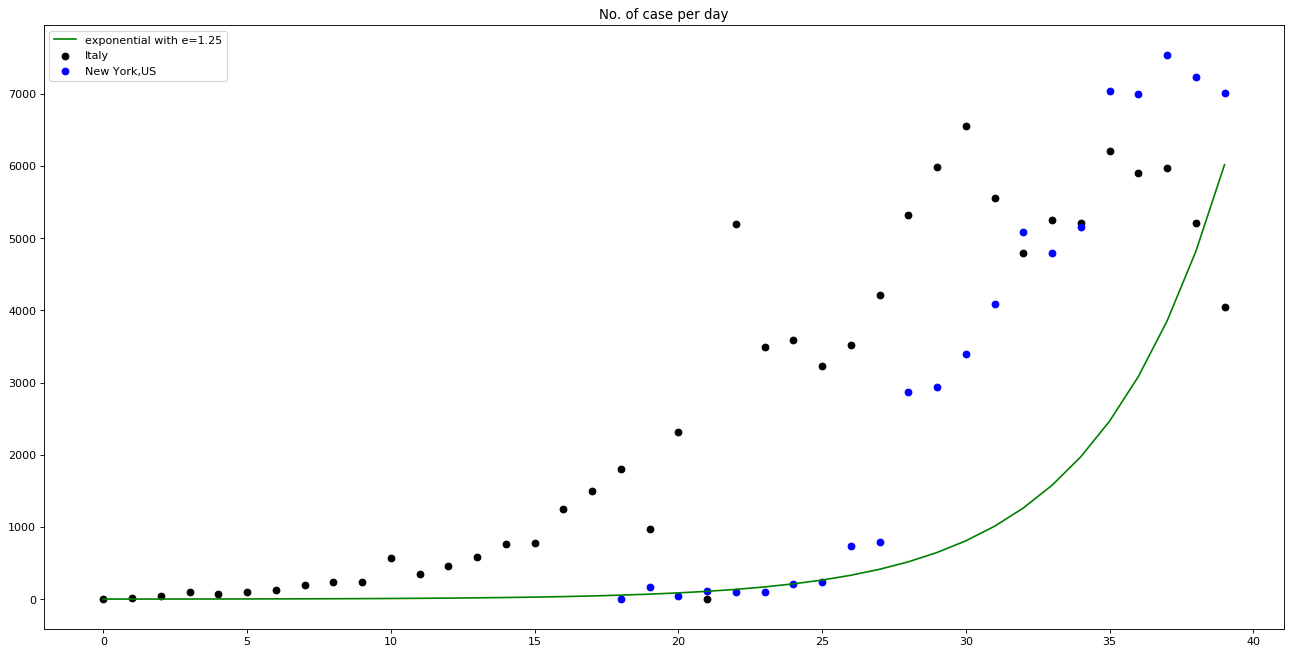

In [8]:
plt.figure(figsize=(20,10),dpi=80)
plt.plot(li_e[:40],color='green',label='exponential with e=1.25')
plt.scatter(index_li,Italy_DF_small_perday,color='black',label='Italy')
plt.scatter(index_li[18:],US_DF_small_perday,color='blue',label='New York,US')
plt.xlabel=("No. of days since case arrived")
plt.ylable=("No. of cases per day")
plt.legend()
plt.title("No. of case per day")